# BANK NOTE ANALYSIS

In [1]:
# We will classify bank note as fake or genuine  based on dataset from UCI Machine Learning Repository  

In [2]:
#!pip install pyforest
from pyforest import*
lazy_imports()

['import os',
 'from openpyxl import load_workbook',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'import plotly.express as px',
 'import skimage',
 'from sklearn import metrics',
 'from sklearn.linear_model import Lasso',
 'import datetime as dt',
 'import lightgbm as lgb',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import pydot',
 'from sklearn.cluster import KMeans',
 'import cv2',
 'from sklearn.impute import SimpleImputer',
 'from dask import dataframe as dd',
 'from PIL import Image',
 'import statistics',
 'import numpy as np',
 'from sklearn.model_selection import StratifiedKFold',
 'from sklearn import svm',
 'from sklearn.ensemble import RandomForestClassifier',
 'import fastai',
 'from xlrd import open_workbook',
 'from pathlib import Path',
 'from sklearn.linear_model import LinearRegression',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.linear_model import ElasticNetCV',
 'from sklearn.model_selection import KFold',
 'im

In [3]:
df = pd.read_csv("BankNote_Authentication.csv")

<IPython.core.display.Javascript object>

In [4]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [5]:
df.tail()

,variance,skewness,curtosis,entropy,class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [6]:
# class = 1 -> Original
# class = 0 -> Fake 

In [7]:
df.shape

(1372, 5)

In [8]:
df['class'].value_counts()# The dataset is balanced 

class
0    762
1    610
Name: count, dtype: int64

In [9]:
df.isna().sum()

variance    0
skewness    0
curtosis    0
entropy     0
class       0
dtype: int64

In [10]:
df.dtypes

variance    float64
skewness    float64
curtosis    float64
entropy     float64
class         int64
dtype: object

In [11]:
# Visualizations 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

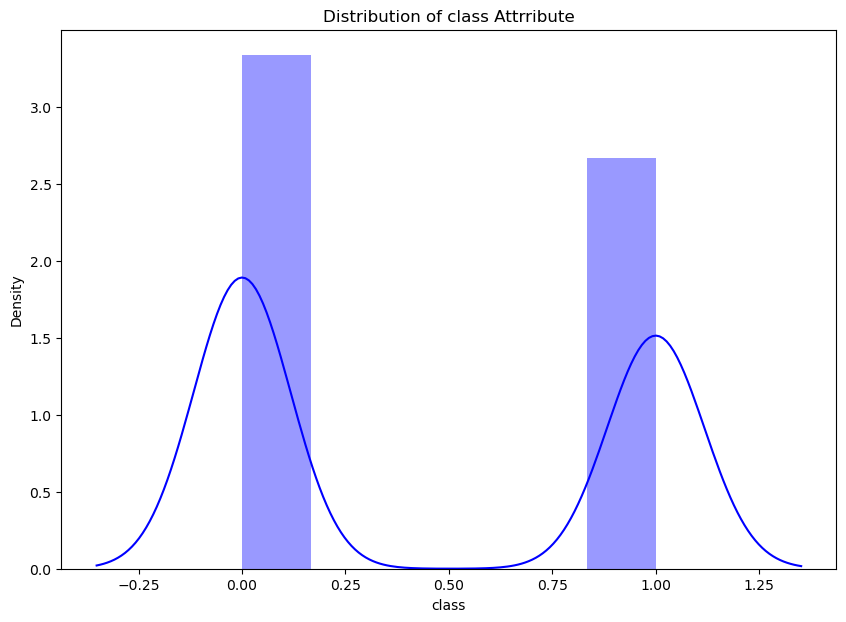

In [12]:
import warnings 
warnings.filterwarnings('ignore')
plt.figure(figsize=(10,7))
plt.title("Distribution of class Attrribute")
sns.distplot(df['class'],color ='blue')
plt.show()

<IPython.core.display.Javascript object>

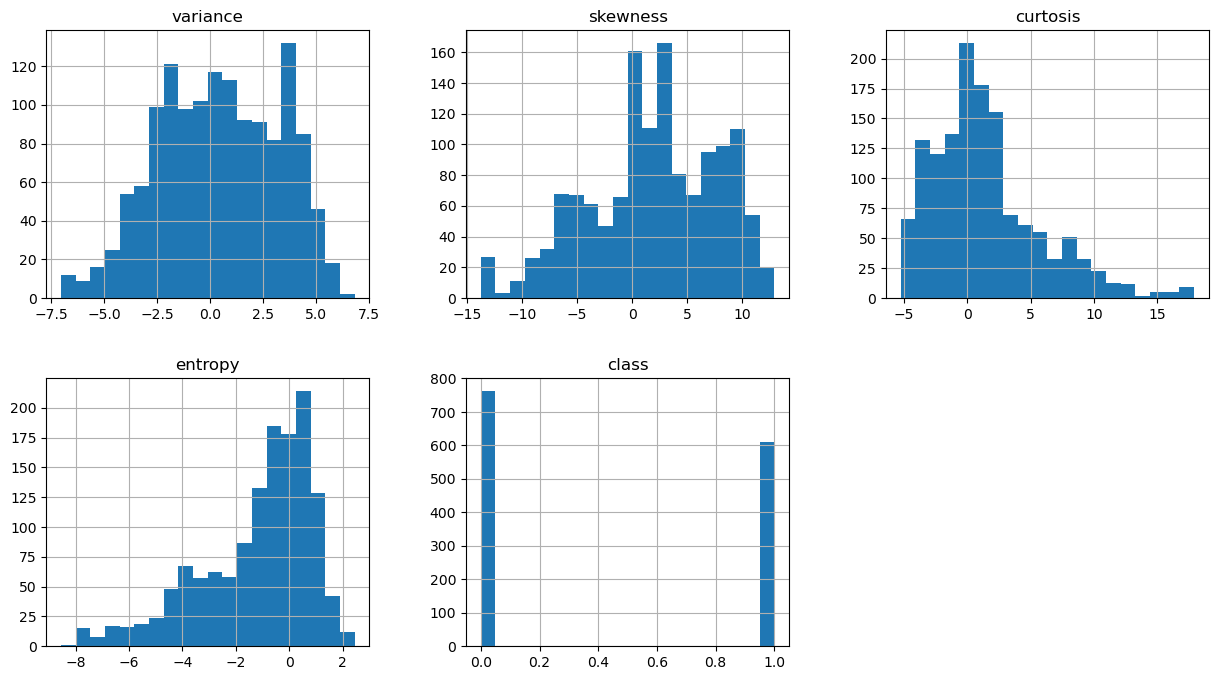

In [13]:
df.hist(bins=20,figsize=(15,8),layout=(2,3))
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

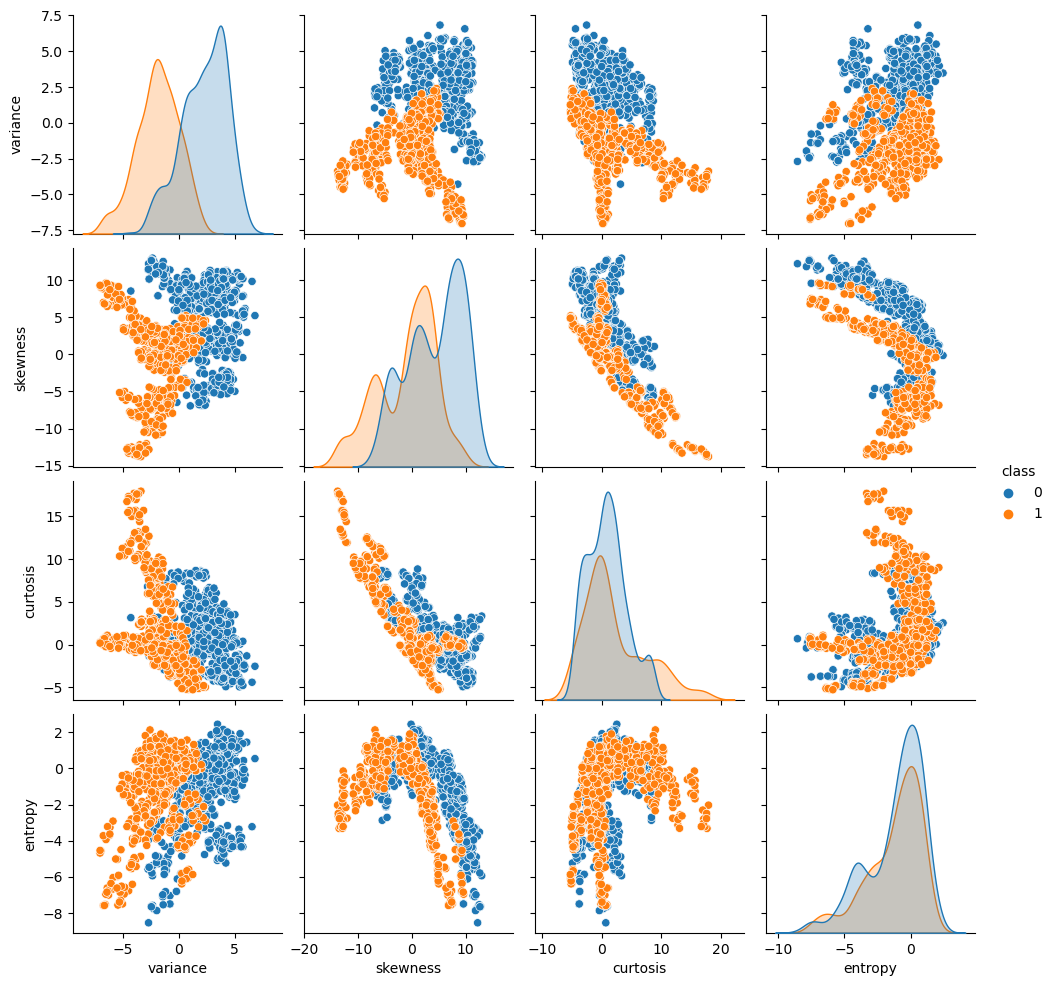

In [14]:
sns.pairplot(df,hue='class')
plt.show()

In [15]:
# DATA PREPARATION 

In [16]:
df.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [17]:
x = df.drop('class',axis = 1)
y = df['class']

In [18]:
x

,variance,skewness,curtosis,entropy
0,3.62160,8.66610,-2.8073,-0.44699
1,4.54590,8.16740,-2.4586,-1.46210
2,3.86600,-2.63830,1.9242,0.10645
3,3.45660,9.52280,-4.0112,-3.59440
4,0.32924,-4.45520,4.5718,-0.98880
...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949
1368,-1.38870,-4.87730,6.4774,0.34179
1369,-3.75030,-13.45860,17.5932,-2.77710
1370,-3.56370,-8.38270,12.3930,-1.28230


In [19]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [20]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

<IPython.core.display.Javascript object>

In [21]:
# Scaling should be performed after spliting the data or else  data leakage wwill occur 

In [22]:
df

,variance,skewness,curtosis,entropy,class
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


**SCALING THE DATA USING STANDARD SCALAR**

In [23]:
# Scaling using StandardScaler 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [24]:
x_train

array([[-1.58438248,  0.1072115 , -0.14276339,  0.03334576],
       [-1.08829139, -2.53123321,  2.67783284, -0.35092979],
       [ 1.13672843, -0.15348755, -0.16820608,  0.86368769],
       ...,
       [-1.6900361 ,  0.72314447, -0.19588896, -2.05114485],
       [ 0.57766241,  0.02698182,  0.1851622 ,  0.52080477],
       [-0.9644631 ,  0.30908695, -0.49734797, -0.03521515]])

In [25]:
x_test

array([[-1.40564511, -0.03629527, -0.25946279, -0.55356298],
       [ 0.27456924,  0.39719812,  0.19050204,  0.69982149],
       [-1.56677623, -1.70567084,  2.36049857, -0.08188265],
       ...,
       [ 0.33303672,  0.90277959, -0.894603  ,  0.10774845],
       [ 0.24291663, -0.00314587, -0.98169159,  0.65423293],
       [ 0.44734548,  0.89770987, -0.5083209 , -0.56573811]])

In [26]:
# No need to scale y  since it is only 1 and 0 

In [27]:
y_train

1226    1
1085    1
148     0
1178    1
478     0
       ..
715     0
905     1
1096    1
235     0
1061    1
Name: class, Length: 1097, dtype: int64

**LOGISTIC REGRESSION**

In [28]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [29]:
lr_model = LogisticRegression(solver='liblinear',random_state = 1)
lr_model.fit(x_train,y_train)

LogisticRegression(random_state=1, solver='liblinear')

In [30]:
lr_accuracy = cross_val_score(estimator = lr_model,X = x_train,y = y_train,cv = 10)

In [31]:
print("Accuracies\n",lr_accuracy)

Accuracies
 [0.98181818 0.99090909 0.98181818 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [32]:
print("Mean Accuracy :",lr_accuracy.mean())

Mean Accuracy : 0.9835863219349459


In [33]:
lr_y_pred = lr_model.predict (x_test)

In [34]:
lr_y_pred

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

In [35]:
test_accuracy = cross_val_score(estimator = lr_model,X = x_test,y = y_test,cv = 10)
test_accuracy

array([1.        , 0.96428571, 1.        , 0.96428571, 0.92857143,
       0.96296296, 0.92592593, 1.        , 0.96296296, 1.        ])

In [36]:
test_accuracy.mean()

0.970899470899471

In [37]:
lr_model.score(x_test,y_test)

0.9745454545454545

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

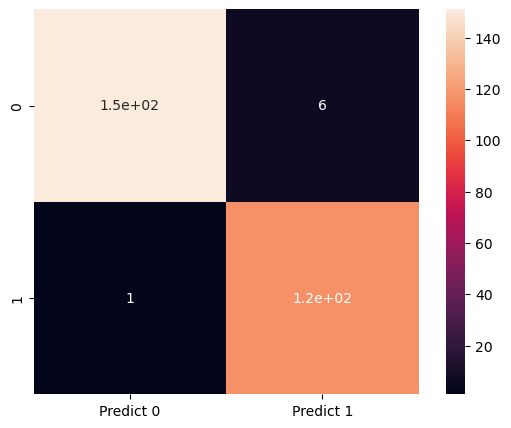

In [38]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,lr_y_pred,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [ i for i in [0,1]],
                    columns = [ i for i in ['Predict 0','Predict 1']])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm,square = True,annot=True)
plt.show()

**SUPPORT VECTOR MACHINE**

In [39]:
from sklearn.svm import SVC 

svm_model = SVC(kernel = 'linear')

svm_model.fit(x_train,y_train)

SVC(kernel='linear')

In [40]:
svm_accuracy = cross_val_score(estimator = svm_model,X = x_train,y = y_train,cv = 10)
print("Accuracy \n",svm_accuracy)

Accuracy 
 [0.99090909 0.99090909 0.99090909 0.99090909 0.99090909 0.99090909
 0.96363636 0.99082569 0.97247706 0.98165138]


In [41]:
svm_accuracy_mean = svm_accuracy.mean()

In [42]:
print("Mean accuracy : ",svm_accuracy_mean)

Mean accuracy :  0.9854045037531277


In [43]:
svm_y_predict = svm_model.predict (x_test)

In [44]:
svm_y_predict

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

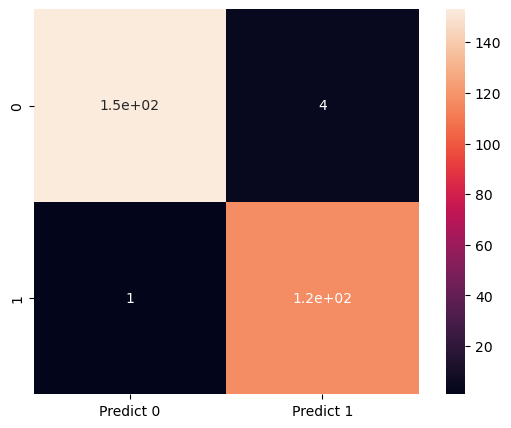

In [45]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,svm_y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [ i for i in [0,1]],
                    columns = [ i for i in ['Predict 0','Predict 1']])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm,square = True,annot=True)
plt.show()

In [46]:
svm_model.score(x_test,y_test)

0.9818181818181818

**HYPERPARAMETER TUNED SUPPORT VECTOR MACHINE**

In [47]:
from sklearn.svm import SVC 

svm_model = SVC(kernel = 'rbf')

svm_model.fit(x_train,y_train)

SVC()

In [48]:
svm_accuracy = cross_val_score(estimator = svm_model,X = x_train,y = y_train,cv = 10)
print("Accuracy \n",svm_accuracy)

Accuracy 
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [49]:
svm_accuracy_mean = svm_accuracy.mean()

In [50]:
print("Mean accuracy : ",svm_accuracy_mean)

Mean accuracy :  1.0


In [51]:
svm_y_predict = svm_model.predict (x_test)

In [52]:
svm_y_predict

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

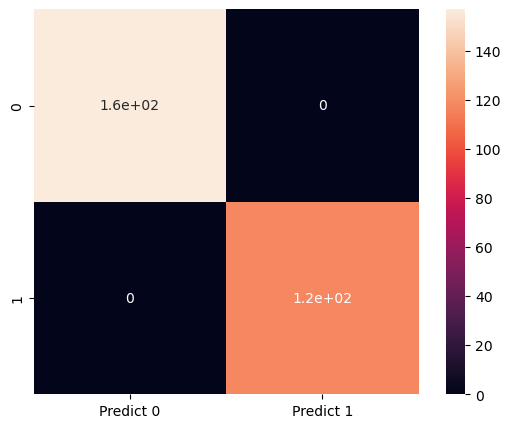

In [53]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,svm_y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [ i for i in [0,1]],
                    columns = [ i for i in ['Predict 0','Predict 1']])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm,square = True,annot=True)
plt.show()

In [54]:
svm_model.score(x_test,y_test)

1.0

**RANDOM FOREST CLASSIFIER**

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
rfc_model = RandomForestClassifier(n_estimators =50 ,criterion='entropy',random_state = 1)

In [57]:
rfc_model.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=1)

In [58]:
rfc_accuracy = cross_val_score(estimator = rfc_model,X = x_train,y = y_train,cv = 10)
print("Accuracy \n",rfc_accuracy)

Accuracy 
 [0.98181818 0.99090909 0.99090909 0.98181818 0.99090909 0.99090909
 1.         1.         1.         1.        ]


In [59]:
rfc_accuracy_mean = rfc_accuracy.mean()

In [60]:
print("Mean accuracy : ",rfc_accuracy_mean)

Mean accuracy :  0.9927272727272728


In [61]:
rfc_y_predict = rfc_model.predict (x_test)

In [62]:
rfc_y_predict

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0], dtype=int64)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

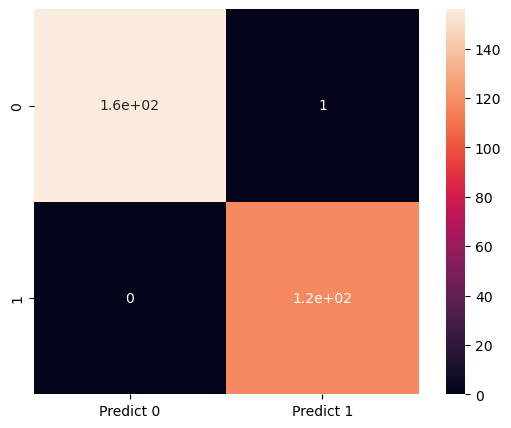

In [63]:
from sklearn import metrics

cm = metrics.confusion_matrix(y_test,rfc_y_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [ i for i in [0,1]],
                    columns = [ i for i in ['Predict 0','Predict 1']])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm,square = True,annot=True)
plt.show()

**K NEAREST NEIGHBORS**

In [64]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold,GridSearchCV

param_grid = {'leaf_size': [2,5,7,9,11],'n_neighbors':[2,5,7,9,11],'p':[1,2]}

grid = GridSearchCV(KNeighborsClassifier(),param_grid = param_grid)

grid.fit(x_train,y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'leaf_size': [2, 5, 7, 9, 11],
                         'n_neighbors': [2, 5, 7, 9, 11], 'p': [1, 2]})

In [65]:
grid.best_params_

{'leaf_size': 2, 'n_neighbors': 2, 'p': 1}

In [66]:
KNN = KNeighborsClassifier(n_neighbors=2,p=1,leaf_size=2)

In [67]:
KNN.fit(x_train,y_train)

KNeighborsClassifier(leaf_size=2, n_neighbors=2, p=1)

In [68]:
KNN_predict = KNN.predict(x_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

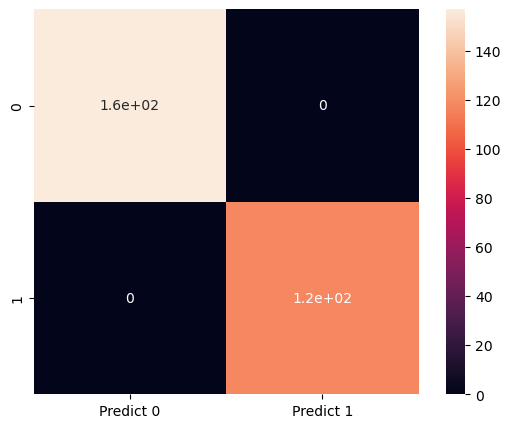

In [69]:
cm = metrics.confusion_matrix(y_test,KNN_predict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [ i for i in [0,1]],
                    columns = [ i for i in ['Predict 0','Predict 1']])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm,square = True,annot=True)
plt.show()

In [70]:
knn_accuracy = cross_val_score(estimator = KNN,X = x_train,y = y_train,cv = 10)
print("Accuracy \n",knn_accuracy)

Accuracy 
 [0.99090909 0.99090909 0.99090909 1.         1.         1.
 1.         1.         1.         1.        ]


In [71]:
knn_accuracy_mean = knn_accuracy.mean()

In [72]:
print("Mean accuracy : ",knn_accuracy_mean)

Mean accuracy :  0.9972727272727273


**Multilayer Perceptron Classifier**

In [73]:
from sklearn.neural_network import MLPClassifier
multi_classifier = MLPClassifier(hidden_layer_sizes=(8,4),max_iter=8000,alpha = 0.0001,solver = 'sgd',verbose=10,random_state = 1,tol=0.000000001)
multi_classifier.fit(x_train,y_train)

Iteration 1, loss = 0.79550185
Iteration 2, loss = 0.79137998
Iteration 3, loss = 0.78541378
Iteration 4, loss = 0.77863058
Iteration 5, loss = 0.77170087
Iteration 6, loss = 0.76491163
Iteration 7, loss = 0.75803559
Iteration 8, loss = 0.75182547
Iteration 9, loss = 0.74552207
Iteration 10, loss = 0.73963951
Iteration 11, loss = 0.73392409
Iteration 12, loss = 0.72854161
Iteration 13, loss = 0.72318779
Iteration 14, loss = 0.71813663
Iteration 15, loss = 0.71307283
Iteration 16, loss = 0.70816773
Iteration 17, loss = 0.70326709
Iteration 18, loss = 0.69851787
Iteration 19, loss = 0.69371023
Iteration 20, loss = 0.68919219
Iteration 21, loss = 0.68457503
Iteration 22, loss = 0.67989494
Iteration 23, loss = 0.67541513
Iteration 24, loss = 0.67088196
Iteration 25, loss = 0.66638568
Iteration 26, loss = 0.66199491
Iteration 27, loss = 0.65746041
Iteration 28, loss = 0.65312948
Iteration 29, loss = 0.64883003
Iteration 30, loss = 0.64443465
Iteration 31, loss = 0.64022907
Iteration 32, los

MLPClassifier(hidden_layer_sizes=(8, 4), max_iter=8000, random_state=1,
              solver='sgd', tol=1e-09, verbose=10)

In [74]:
multipredict = multi_classifier.predict(x_test)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

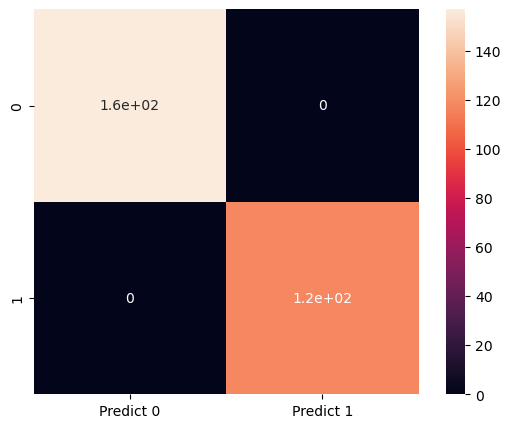

In [75]:
cm = metrics.confusion_matrix(y_test,multipredict,labels=[0,1])

df_cm = pd.DataFrame(cm, index = [ i for i in [0,1]],
                    columns = [ i for i in ['Predict 0','Predict 1']])

plt.figure(figsize = (7,5))
sns.heatmap(df_cm,square = True,annot=True)
plt.show()

**Printing each algorithm and accuracy score**

In [76]:
print("Logistic Regression",test_accuracy.mean())
print("Support Vector Machine(kernel = liblinear)",svm_accuracy.mean())
print("Support Vector Machine(kernel = rbf)",100)
print("Random Forest Classifier",rfc_accuracy_mean)
print("K Neighbors ",knn_accuracy.mean())
print("Multi Layer perception {}".format(100))

Logistic Regression 0.970899470899471
Support Vector Machine(kernel = liblinear) 1.0
Support Vector Machine(kernel = rbf) 100
Random Forest Classifier 0.9927272727272728
K Neighbors  0.9972727272727273
Multi Layer perception 100
